In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('BlackFriday.csv')

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
df['User_ID'].nunique()

5891

In [12]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [14]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [16]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [20]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [22]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [24]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [26]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [28]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [30]:
for column in df.columns:
    print(df[column].nunique(), "\t: ", column )

5891 	:  User_ID
3623 	:  Product_ID
2 	:  Gender
7 	:  Age
21 	:  Occupation
3 	:  City_Category
5 	:  Stay_In_Current_City_Years
2 	:  Marital_Status
18 	:  Product_Category_1
17959 	:  Purchase


In [32]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F']) ]} , index = ['Male' , 'Female'] )

In [34]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

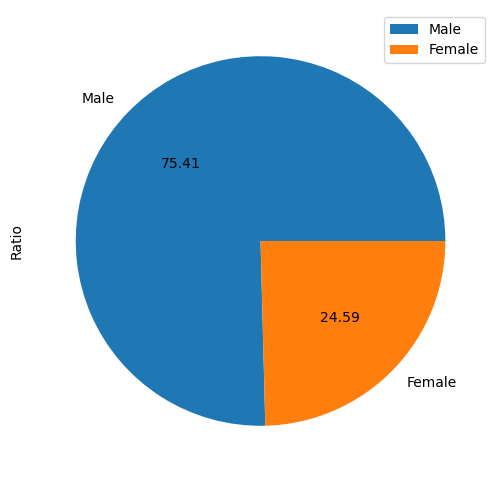

In [36]:
data.plot.pie( y = 'Ratio' , figsize = (6,6) , autopct = '%.2f')

<Axes: title={'center': 'Gender Ratio'}>

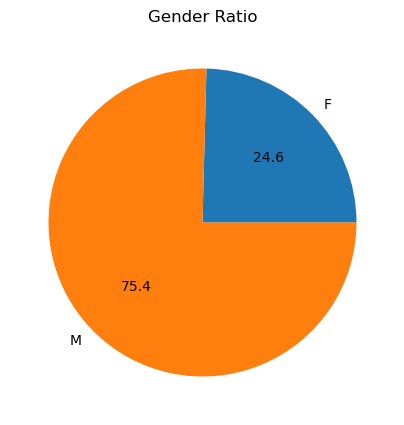

In [37]:
df.groupby('Gender').size().plot(kind = 'pie' , autopct = '%.1f' , title = 'Gender Ratio' , figsize = (5,5))

<Axes: ylabel='Purchase'>

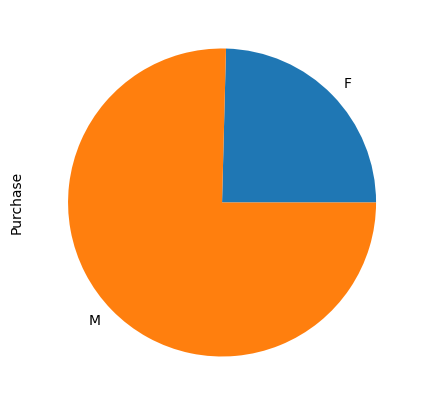

In [17]:
df.groupby('Gender')['Purchase'].size().plot(kind = 'pie' , figsize = (5,5))

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

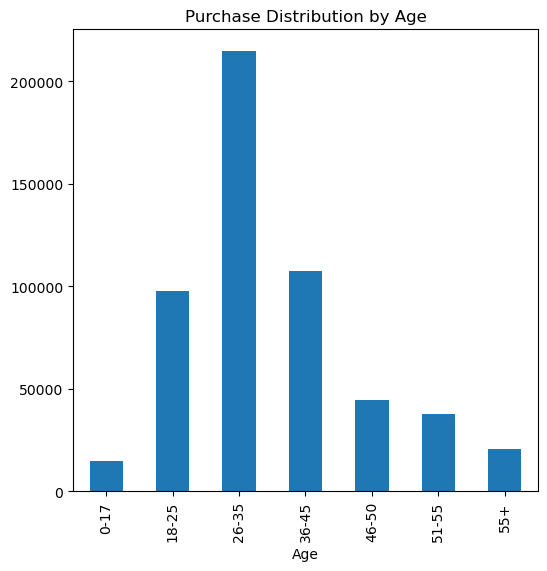

In [59]:
df.groupby('Age').size().plot(kind = 'bar' , figsize = (6,6) , title = 'Purchase Distribution by Age')

In [47]:
lst = []
for i in df['Age'].unique():
    lst.append([i , df[df['Age'] == i ] ['Product_ID'].nunique()])

data  = pd.DataFrame(lst , columns= ['Age' , 'Products'])

<Axes: xlabel='Age'>

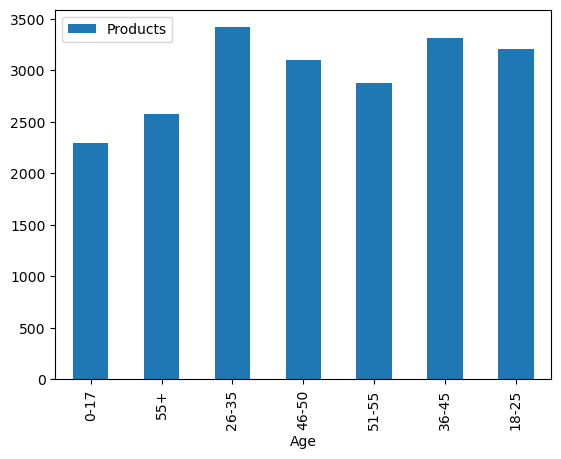

In [57]:
data.plot.bar(x = 'Age' )

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

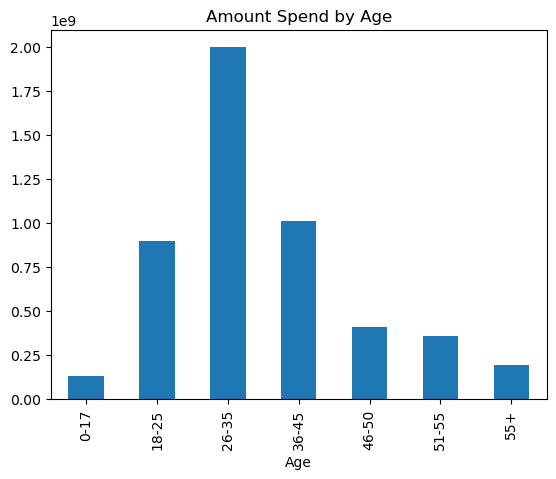

In [69]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar'  , title = 'Amount Spend by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

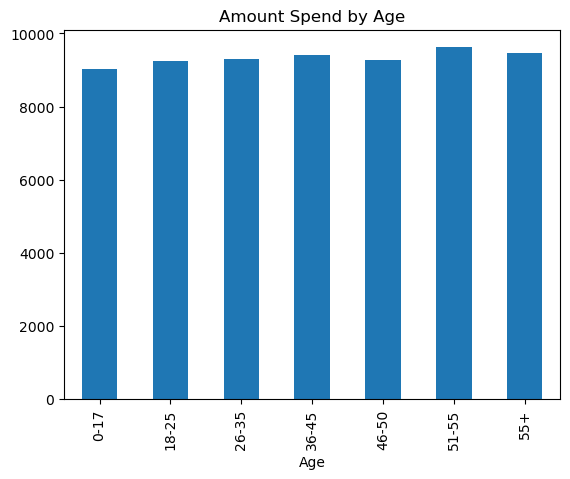

In [67]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar'  , title = 'Amount Spend by Age')

<Axes: ylabel='Purchase'>

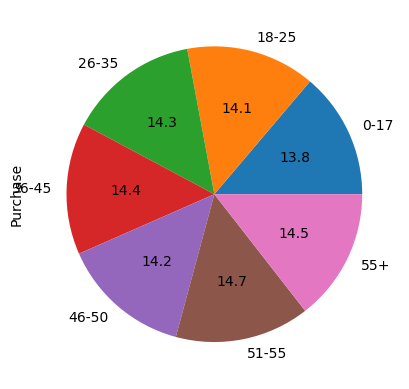

In [71]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie' , autopct = '%.1f')

<Axes: >

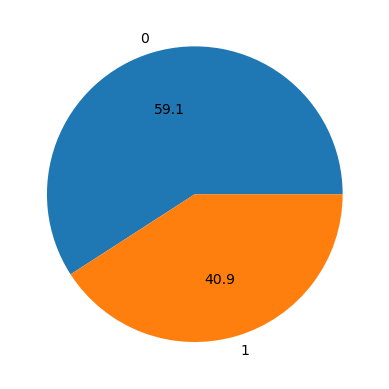

In [76]:
df.groupby('Marital_Status').size().plot(kind = 'pie' , autopct = '%.1f')

<Axes: >

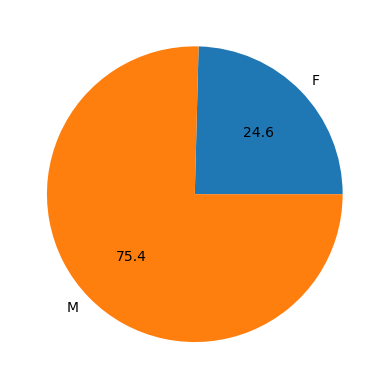

In [78]:
df.groupby('Gender').size().plot(kind = 'pie' , autopct = '%.1f')

<Axes: xlabel='Age', ylabel='count'>

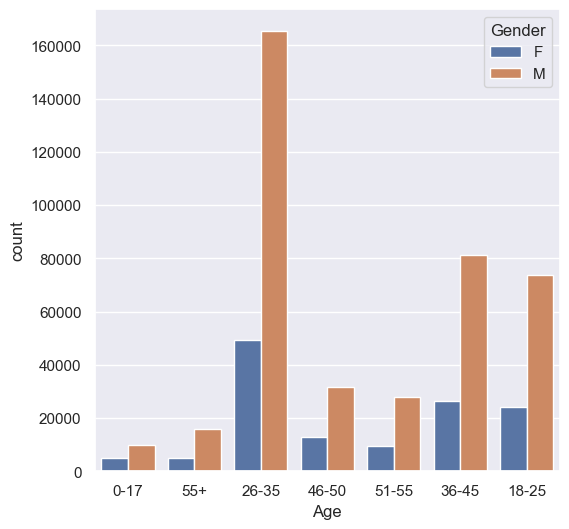

In [88]:
sns.set(rc = {'figure.figsize' : (6,6)} )
sns.countplot(x = 'Age' ,  hue = 'Gender', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

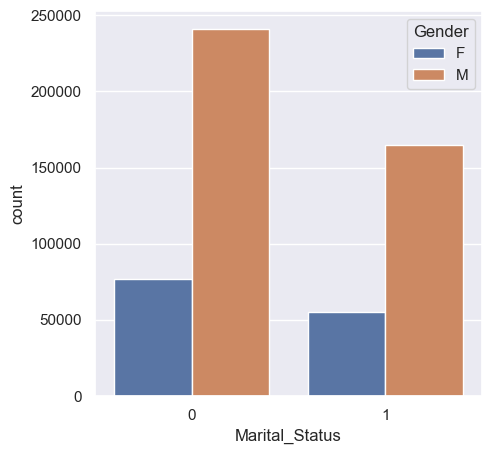

In [98]:
sns.set(rc = {'figure.figsize' : (5,5)} )
sns.countplot(x = 'Marital_Status' ,  hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

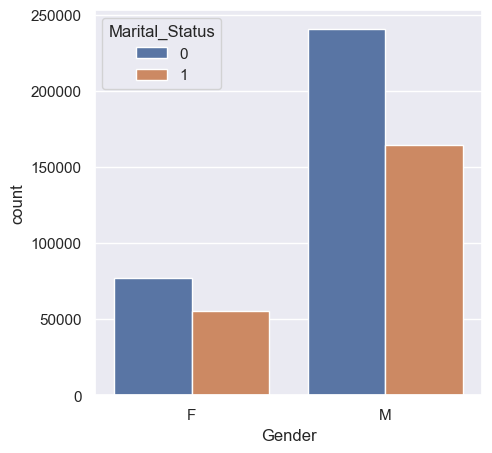

In [96]:
sns.set(rc = {'figure.figsize' : (5,5)} )
sns.countplot(x = 'Gender' ,  hue = 'Marital_Status', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

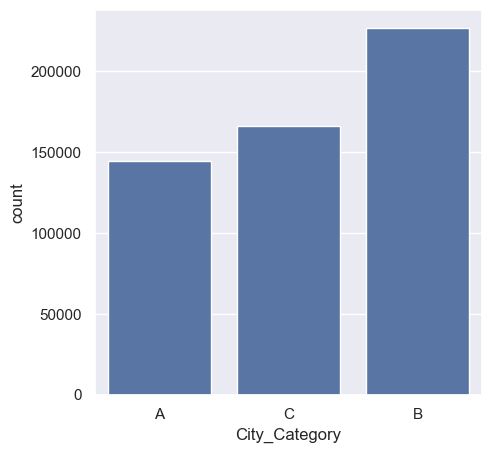

In [104]:
sns.set(rc = {'figure.figsize' : (5,5)})
sns.countplot(x = df['City_Category'] )

<Axes: xlabel='City_Category', ylabel='count'>

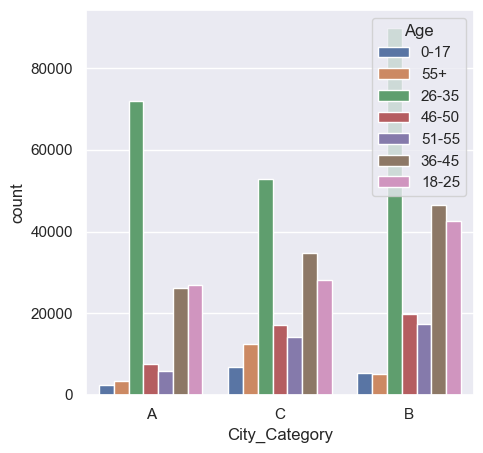

In [106]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

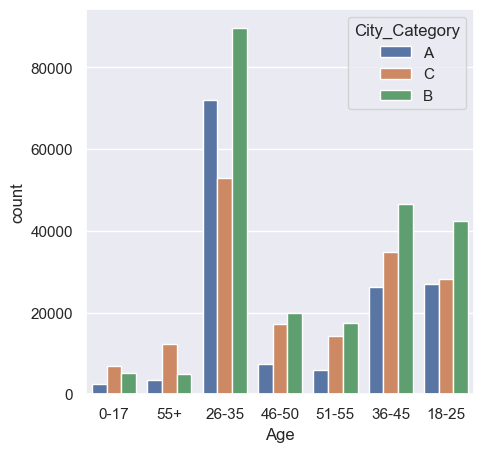

In [108]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

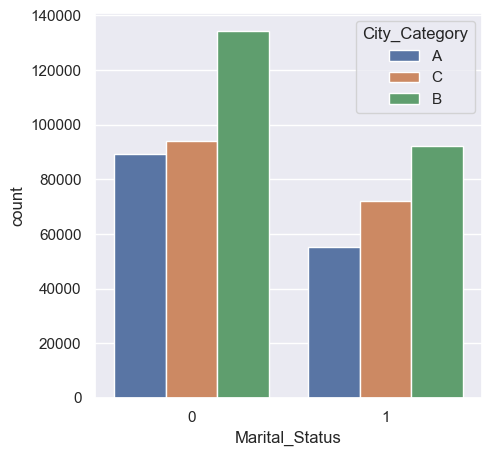

In [110]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: >

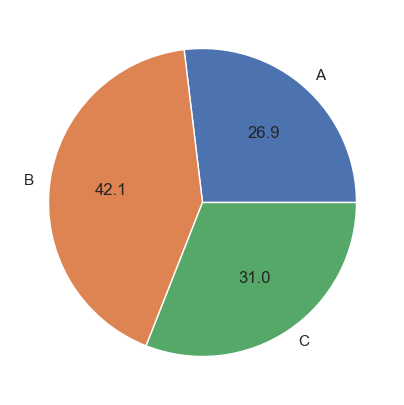

In [112]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

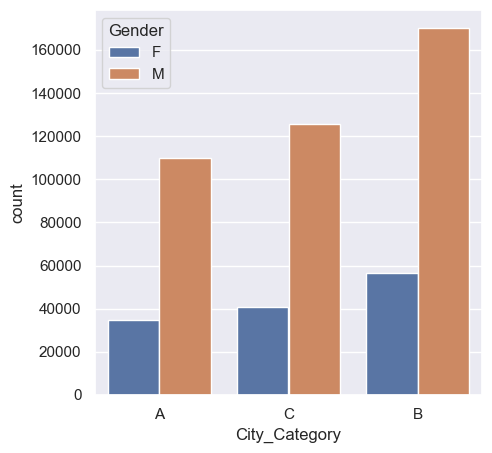

In [114]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<Axes: xlabel='City_Category'>

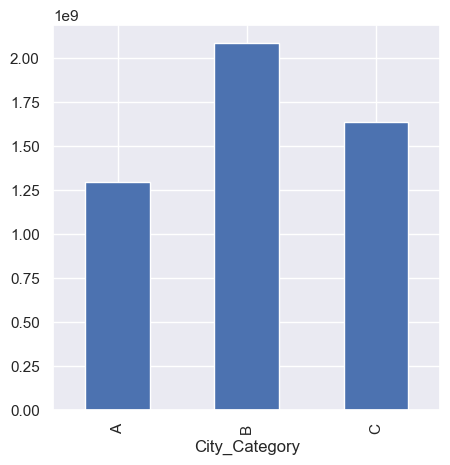

In [116]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'bar' )

<Axes: ylabel='Purchase'>

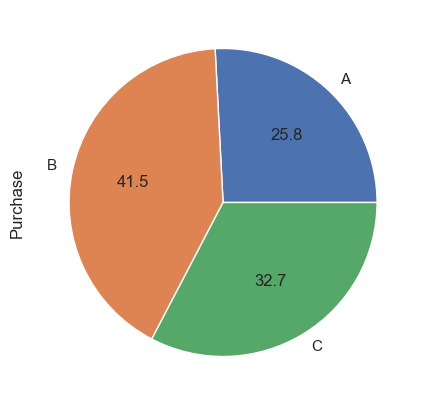

In [118]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie' , autopct = '%.1f' )

<Axes: ylabel='Purchase'>

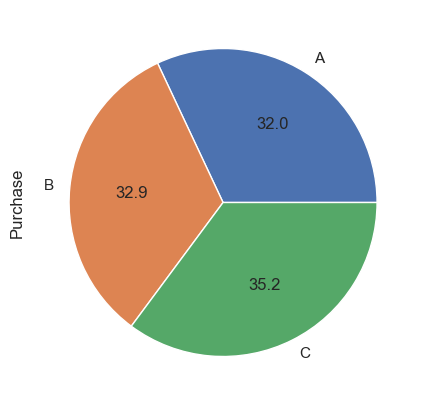

In [120]:
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie' , autopct = '%.1f' )

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

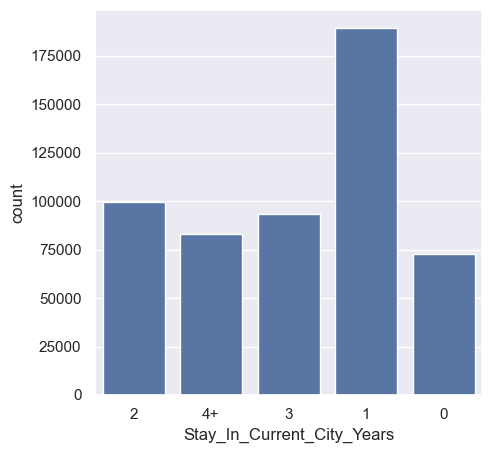

In [128]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: >

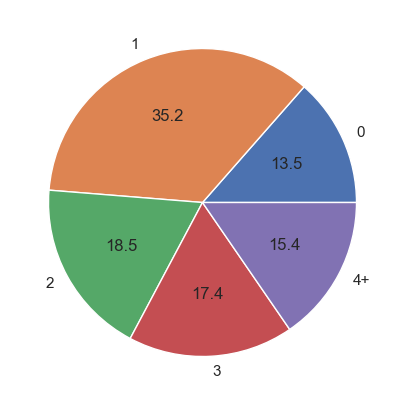

In [144]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie' , autopct = '%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

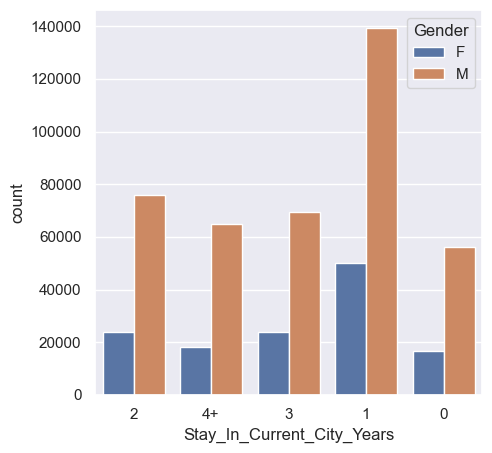

In [130]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender' , data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

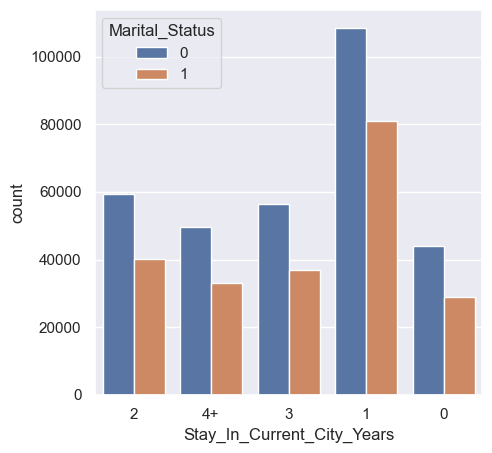

In [134]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status' , data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

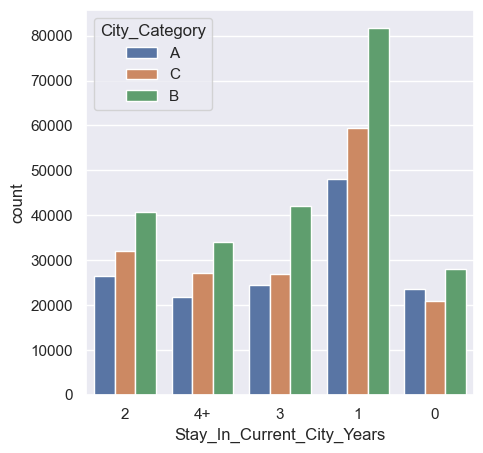

In [136]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category' , data = df)

<Axes: xlabel='City_Category', ylabel='count'>

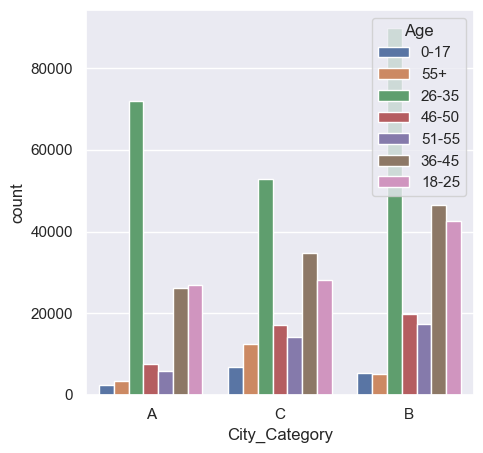

In [138]:
sns.countplot(x = 'City_Category', hue = 'Age' , data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

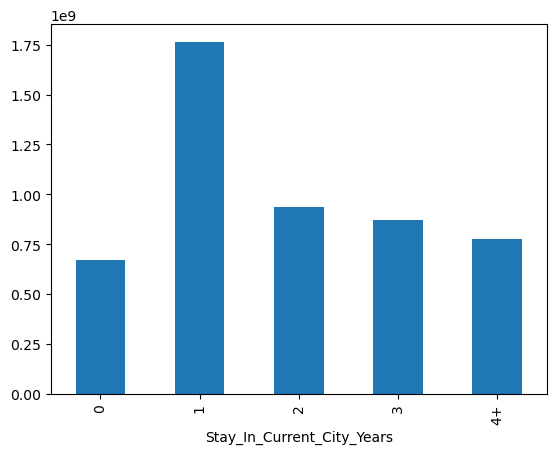

In [10]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

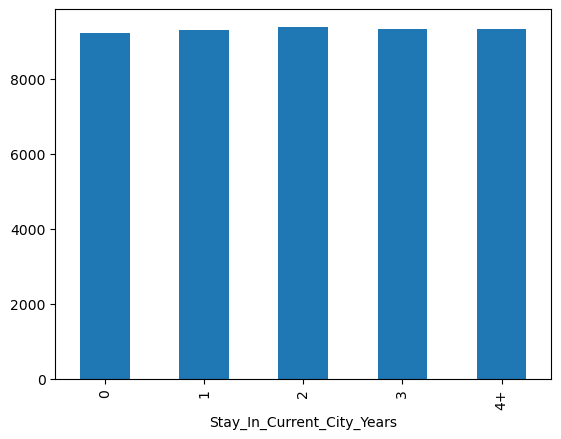

In [14]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

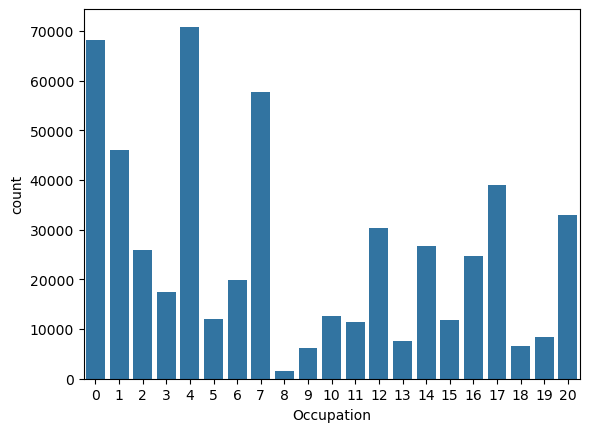

In [16]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

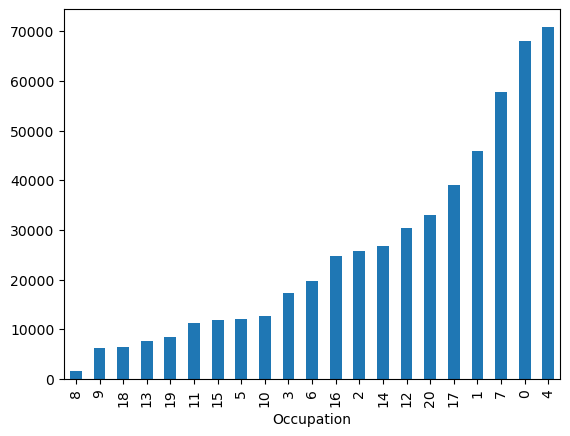

In [18]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

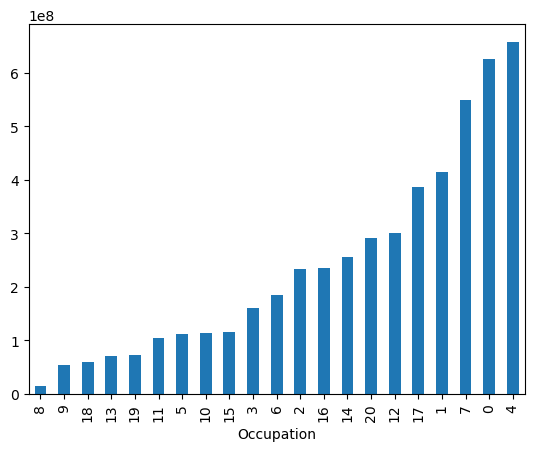

In [25]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

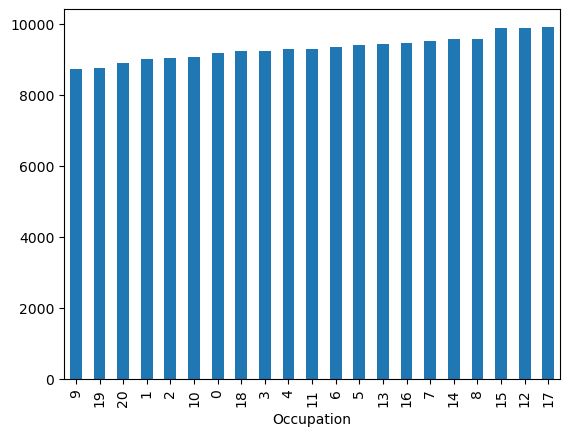

In [23]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

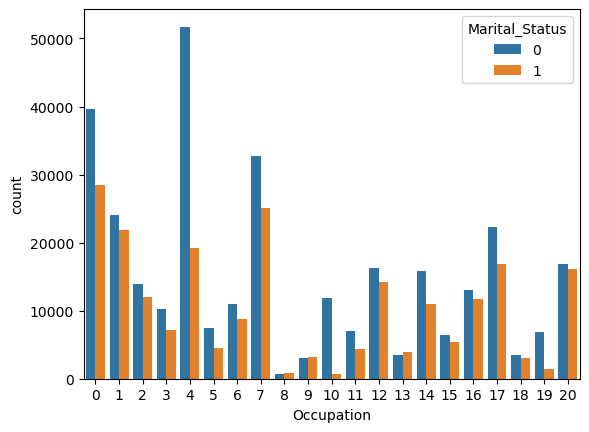

In [29]:
sns.countplot( x = 'Occupation' , hue = 'Marital_Status' , data = df)

<Axes: xlabel='Occupation', ylabel='count'>

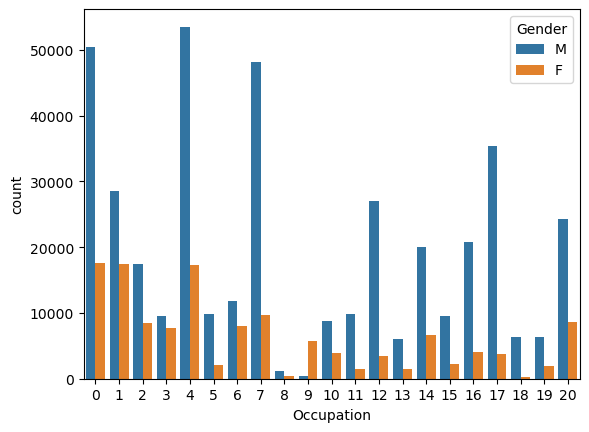

In [31]:
sns.countplot( x = 'Occupation' , hue = 'Gender' , data = df)

<Axes: xlabel='Occupation'>

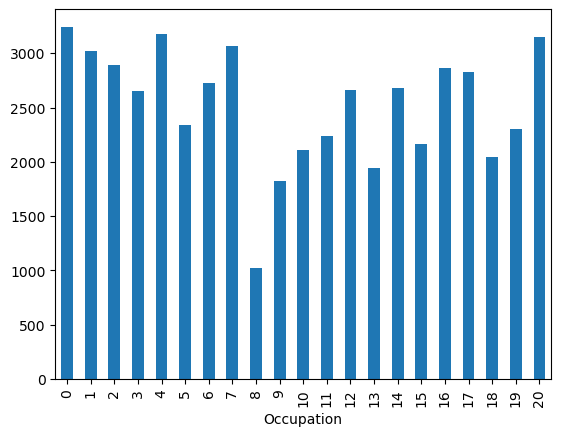

In [33]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

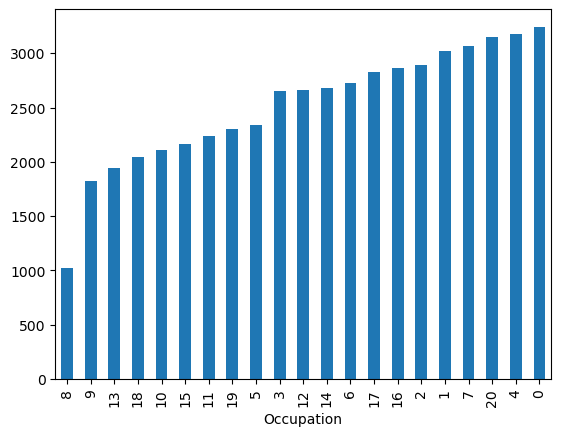

In [35]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

### Combining Gender & Marital Status

In [11]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] + "_" + str(df['Marital_Status'][i]))

df['MaritalGender'] = l

<Axes: xlabel='MaritalGender', ylabel='count'>

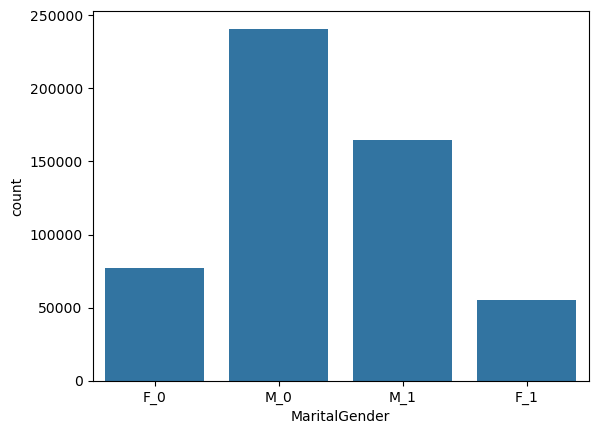

In [15]:
sns.countplot(x = df['MaritalGender'] )

<Axes: xlabel='Age', ylabel='count'>

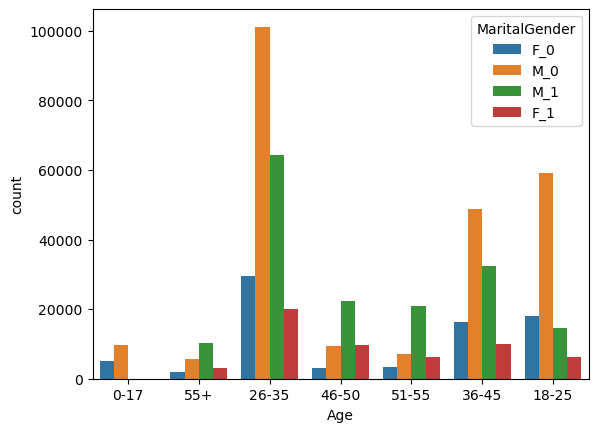

In [19]:
sns.countplot(x = df['Age'] , hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

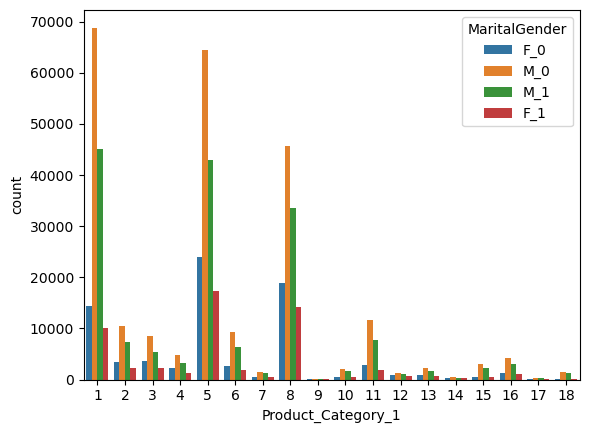

In [21]:
sns.countplot(x = df['Product_Category_1'] , hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

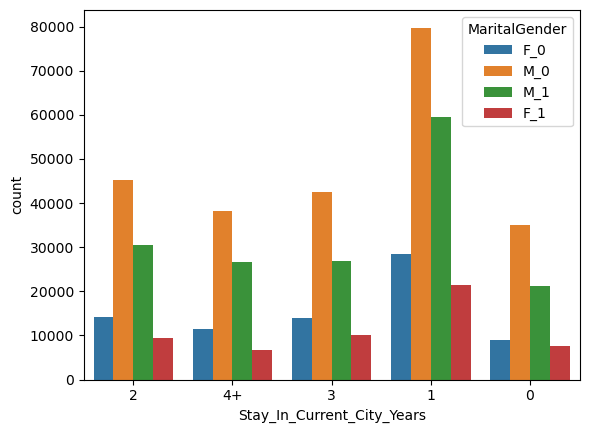

In [23]:
sns.countplot(x = df['Stay_In_Current_City_Years'] , hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

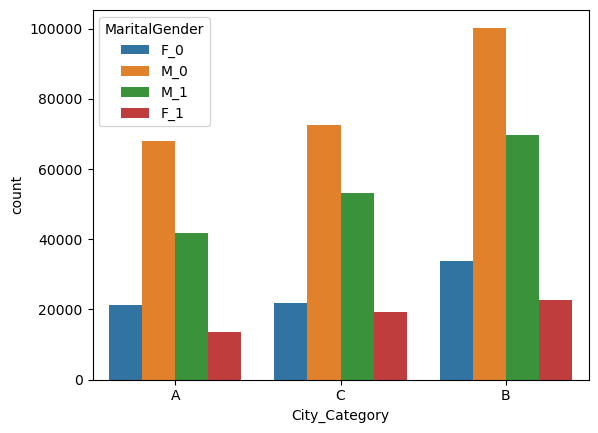

In [25]:
sns.countplot(x = df['City_Category'] , hue = df['MaritalGender'])